In [8]:
from DelauneyDC import DelaunayDC
from QuadEdge import QuadEdge,EdgeType
from Site import Site
from DebugUtils import *
import os

In [9]:
# Test reading input
input_folder = "Input"
max_iter = 2
value_limit = 1000
for counter in range(2,max_iter+1):
    print(f"Current iteration: {counter}")
    QuadEdge.name_id = 0
    num_sites = 100000
    input_file = os.path.join(input_folder,f"{num_sites}_{value_limit}_{counter}.csv")
    S = Site.generate_from_file(num_sites,input_file)

Current iteration: 2


In [10]:
delaunay_solver = DelaunayDC()
delaunay_solver.enable_save_edge = True
delaunay_solver.start_solve(S)

preparing data
finish preparing data - length: 10


(<QuadEdge.QuadEdge at 0x10fadb850>, <QuadEdge.QuadEdge at 0x10f7ce0d0>)

In [11]:
edge_store = delaunay_solver.edge_store
debug_edges(edge_store)
active_edge = [edge for edge in edge_store if edge.active]
cross_edge = [edge for edge in edge_store if edge.active and edge.type == EdgeType.CROSS]

print(len(active_edge))
print(len(cross_edge))
# Check for same record that cross_edge is also inactive
active_cross_edge = []
for edge in active_edge:
    #Check
    next = edge.rot
    is_active = True
    while next != edge:
        if not next.active:
            is_active = False
            break
        next = next.rot
    if is_active:
        active_cross_edge.append(edge)
print(len(active_cross_edge))
all_edges = active_cross_edge
print(len(all_edges))

name - active - type: 56 - True - EdgeType.CROSS
name - active - type: 72 - True - EdgeType.CROSS
name - active - type: 16 - True - EdgeType.CROSS
name - active - type: 24 - True - EdgeType.CROSS
name - active - type: 48 - True - EdgeType.CROSS
name - active - type: 36 - True - EdgeType.NORMAL
name - active - type: 80 - True - EdgeType.CROSS
name - active - type: 96 - True - EdgeType.CROSS
name - active - type: 40 - True - EdgeType.NORMAL
name - active - type: 2 - True - EdgeType.NORMAL
name - active - type: 60 - True - EdgeType.CROSS
name - active - type: 64 - True - EdgeType.CROSS
name - active - type: 32 - True - EdgeType.NORMAL
name - active - type: 52 - True - EdgeType.CROSS
name - active - type: 92 - True - EdgeType.CROSS
name - active - type: 8 - True - EdgeType.NORMAL
name - active - type: 20 - True - EdgeType.CROSS
name - active - type: 84 - True - EdgeType.CROSS
name - active - type: 4 - True - EdgeType.NORMAL
name - active - type: 28 - True - EdgeType.CROSS
name - active - t

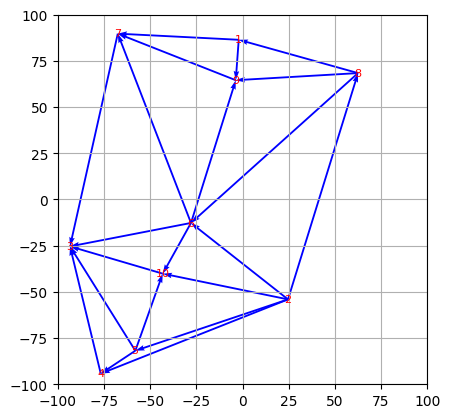

In [12]:
annotate_data = generate_anotation(S)
draw_edges(edge_store=all_edges,annotate_data=annotate_data,x_limit=[-1000,1000],y_limit=[-1000,1000])